In [1]:
import numpy as np
import random
random.seed(7)
from gridworld import *

In [2]:
MAX_NUM_STEPS_PER_EPISODE = 10000
environment = Environment()

In [3]:
# TD(0)
num_episodes = 100000
step_size = 0.001
V = np.zeros(len(environment.transitions))
rms_error_per_episode = []
for ep in range(num_episodes):
    state = environment.generate_random_start_state()
    for t in range(MAX_NUM_STEPS_PER_EPISODE):
        action = random.choice(environment.available_actions)
        reward, new_state, reached_terminal_state = environment.take_action(state, action)
        V[state] += step_size * (reward + V[new_state] - V[state])
        state = new_state
        if reached_terminal_state:
            break
    rms_error_per_episode.append(compute_rms_error(V))
V

array([  0.        , -14.17754254, -20.01514716, -22.0802292 ,
       -14.00443962, -18.05055685, -20.08190474, -20.09216177,
       -19.98935926, -20.07798407, -18.01347044, -13.97455873,
       -22.08353588, -20.11964308, -13.86883972])

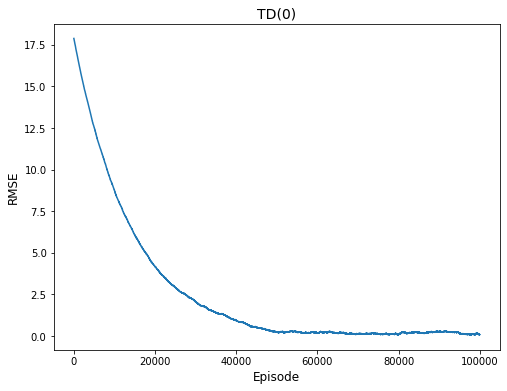

In [4]:
plot_progress(rms_error_per_episode, (8, 6), "TD(0)")

In [5]:
# n-step TD
num_episodes = 100000
step_size = 0.001
n = 3
V = np.zeros(len(environment.transitions))
rms_error_per_episode = []
for ep in range(num_episodes):
    rewards = []
    states = [environment.generate_random_start_state()]
    T = np.inf
    for t in range(MAX_NUM_STEPS_PER_EPISODE):
        if t < T:
            action = random.choice(environment.available_actions)
            reward, new_state, reached_terminal_state = environment.take_action(states[t], action)
            rewards.append(reward)
            states.append(new_state)
            if reached_terminal_state:
                T = t + 1
        tau = t - n + 1
        if tau >= 0:
            G = np.sum(rewards[tau:min(tau + n, T)])
            if tau + n < T:
                G = G + V[states[tau + n]]
            V[states[tau]] += step_size * (G - V[states[tau]])
        if tau == T - 1:
            break
    rms_error_per_episode.append(compute_rms_error(V))
V

array([  0.        , -14.17636992, -20.2604835 , -22.08727368,
       -14.39232653, -18.06449959, -20.03788821, -19.74621428,
       -20.40110388, -19.71846281, -17.73341203, -13.77868259,
       -21.91738656, -19.92979087, -13.70439255])

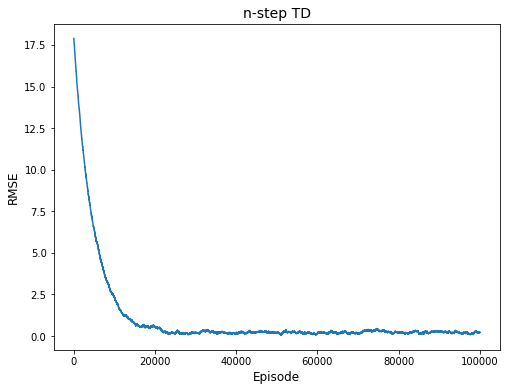

In [6]:
plot_progress(rms_error_per_episode, (8, 6), "n-step TD")

In [7]:
# n-step sum of TD errors
num_episodes = 100000
step_size = 0.001
n = 3
V = np.zeros(len(environment.transitions))
rms_error_per_episode = []
for ep in range(num_episodes):
    td_errors = []
    states = [environment.generate_random_start_state()]
    T = np.inf
    for t in range(MAX_NUM_STEPS_PER_EPISODE):
        if t < T:
            action = random.choice(environment.available_actions)
            reward, new_state, reached_terminal_state = environment.take_action(states[t], action)
            td_errors.append(reward + V[new_state] - V[states[t]])
            states.append(new_state)
            if reached_terminal_state:
                T = t + 1
        tau = t - n + 1
        if tau >= 0:
            V[states[tau]] += step_size * np.sum(td_errors[tau:min(tau + n, T)])
        if tau == T - 1:
            break
    rms_error_per_episode.append(compute_rms_error(V))
V

array([  0.        , -14.15152366, -20.05958813, -22.18007957,
       -14.02956967, -18.04268413, -20.11270627, -20.05484792,
       -20.15653234, -20.17819552, -18.18143121, -14.12558426,
       -21.9466388 , -19.77066935, -14.02966209])

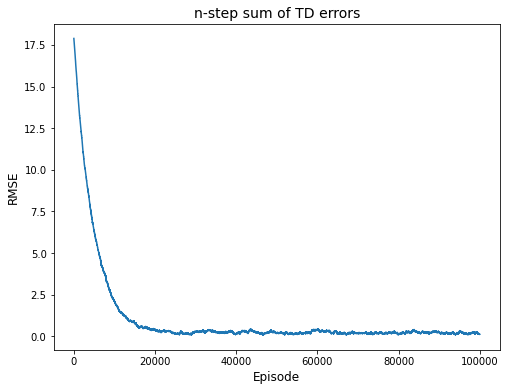

In [8]:
plot_progress(rms_error_per_episode, (8, 6), "n-step sum of TD errors")

In [9]:
TODO: do multiple runs per method befor plotting
TODO: plot all in same plot

SyntaxError: invalid syntax (2457731423.py, line 1)